In [1]:
import scanpy as sc
import os
import pandas as pd
import pickle as pkl
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.5.1 anndata==0.7.3 umap==0.4.3 numpy==1.18.1 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.22.1 statsmodels==0.11.1


/home/sliang3/miniconda3/envs/scanpy/lib/python3.8/site-packages/umap/spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets


# Read Data

Read data using loom

In [3]:
# adata = sc.read_loom("../data/PDAC/scRNA_fna_SeuratObject_ALL.loom")

In [4]:
# with open("../data/PDAC/scRNA_fna_SeuratObject_ALL.pkl", 'wb') as file:
#     pkl.dump(obj=adata, file=file)

In [5]:
with open("../data/PDAC/scRNA_fna_SeuratObject_ALL.pkl", 'rb') as file:
    adata = pkl.load(file)

In [6]:
adata

AnnData object with n_obs × n_vars = 31720 × 24422
    obs: 'ClusterID', 'ClusterName', 'G2M_Score', 'Phase', 'S_Score', 'cell_type', 'integrated_snn_res_0_5', 'nCount_RNA', 'nFeature_RNA', 'orig_ident', 'percent_mt', 'seurat_clusters', 'stage'
    var: 'Selected', 'vst_mean', 'vst_variable', 'vst_variance', 'vst_variance_expected', 'vst_variance_standardized'
    layers: 'norm_data'

In [7]:
adata.obs

,ClusterID,ClusterName,G2M_Score,Phase,S_Score,cell_type,integrated_snn_res_0_5,nCount_RNA,nFeature_RNA,orig_ident,percent_mt,seurat_clusters,stage
AAACCTGGTTCCCTTG_1,3,Myeloid,-0.139026,G1,-0.102319,Myeloid,8,7110.0,2112,P1,4.289733,8,Primary
AAACGGGCAATCCGAT_1,3,Myeloid,0.005527,G2M,-0.019100,Myeloid,11,862.0,436,P1,29.118330,11,Primary
AAACGGGTCGAATCCA_1,2,T,0.014605,G2M,-0.015689,T,3,919.0,484,P1,7.508161,3,Primary
AAAGATGTCCACTCCA_1,2,T,-0.022346,S,0.006563,T,3,1432.0,706,P1,7.262570,3,Primary
AAAGATGTCTGCGTAA_1,2,T,-0.025140,S,0.003153,T,0,1675.0,686,P1,4.059701,0,Primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...
attagtatagcgcgttat_9,1,Epithelial,-0.015158,G1,-0.012173,Epithelial,6,449.0,269,PM,0.000000,6,Metastasis
ccacgcgtacagaccttc_9,1,Epithelial,0.001490,S,0.081848,Epithelial,6,448.0,272,PM,0.000000,6,Metastasis
gctcccagtaaaggtagg_9,1,Epithelial,-0.011416,G1,-0.010956,Epithelial,5,446.0,293,PM,0.000000,5,Metastasis
tgaatttgcggtgtacag_9,1,Epithelial,-0.031338,G1,-0.006695,Epithelial,2,446.0,291,PM,0.000000,2,Metastasis


# NK cells

In [8]:
lymphocytes = adata[adata.obs.ClusterName.isin(['NK'])]
lymphocytes

View of AnnData object with n_obs × n_vars = 1656 × 24422
    obs: 'ClusterID', 'ClusterName', 'G2M_Score', 'Phase', 'S_Score', 'cell_type', 'integrated_snn_res_0_5', 'nCount_RNA', 'nFeature_RNA', 'orig_ident', 'percent_mt', 'seurat_clusters', 'stage'
    var: 'Selected', 'vst_mean', 'vst_variable', 'vst_variance', 'vst_variance_expected', 'vst_variance_standardized'
    layers: 'norm_data'

normalizing counts per cell
    finished (0:00:00)


/home/sliang3/miniconda3/envs/scanpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


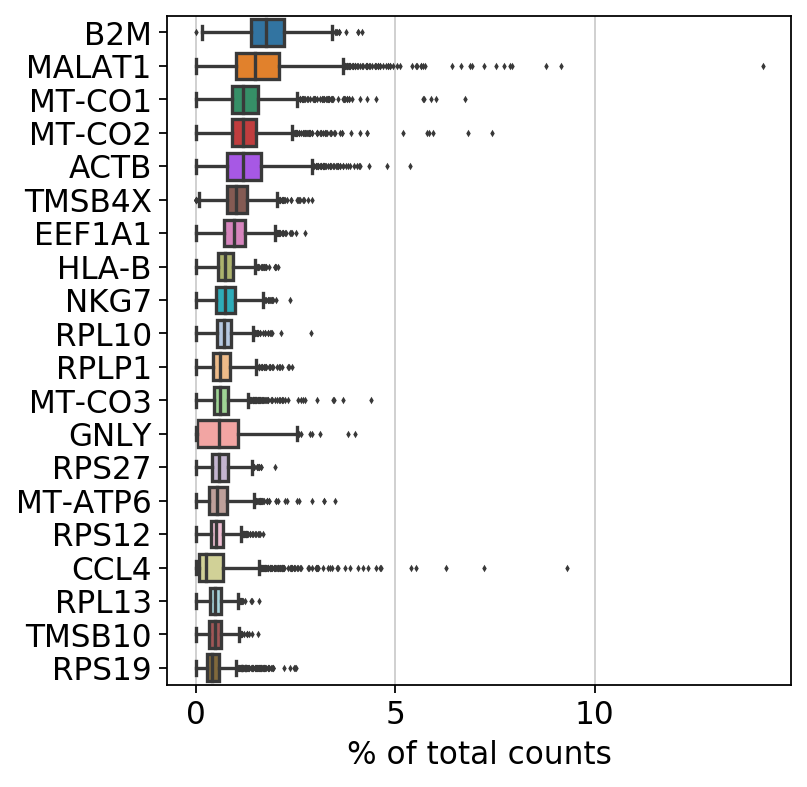

In [9]:
sc.pl.highest_expr_genes(lymphocytes, n_top=20)

In [10]:
sc.pp.filter_cells(lymphocytes, min_genes=200)
sc.pp.filter_genes(lymphocytes, min_cells=3)

filtered out 10879 genes that are detected in less than 3 cells


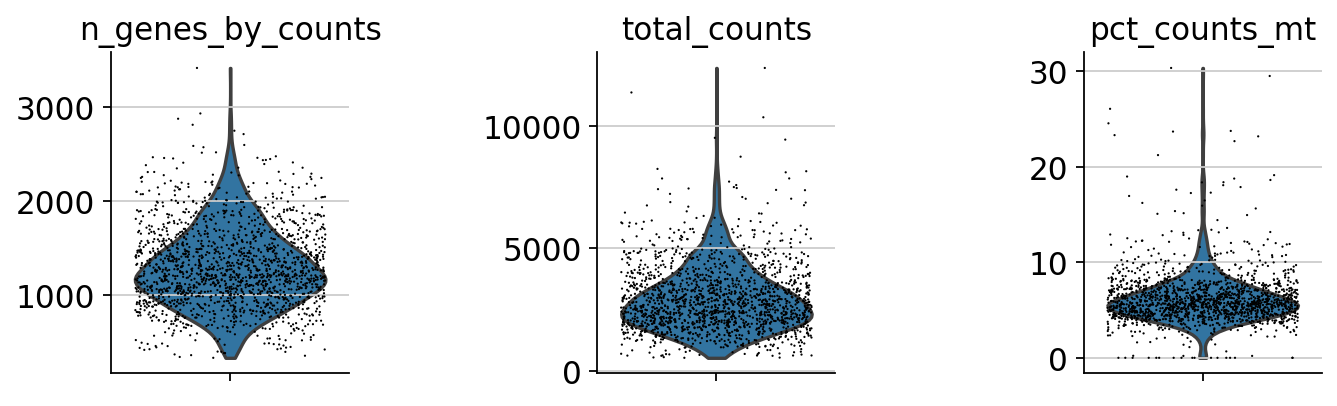

In [11]:
lymphocytes.var['mt'] = lymphocytes.var.index.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(lymphocytes, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(lymphocytes, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

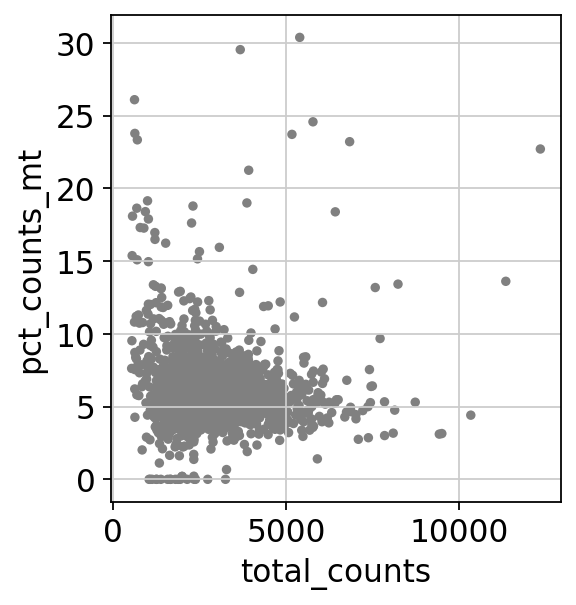

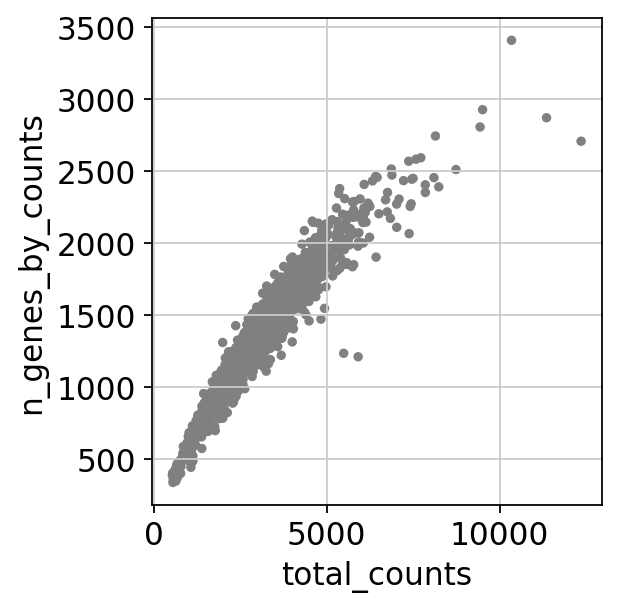

In [12]:
sc.pl.scatter(lymphocytes, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(lymphocytes, x='total_counts', y='n_genes_by_counts')

In [13]:
lymphocytes = lymphocytes[(lymphocytes.obs.pct_counts_mt < 20) & (lymphocytes.obs.n_genes_by_counts < 4000) , :]
lymphocytes

View of AnnData object with n_obs × n_vars = 1646 × 13543
    obs: 'ClusterID', 'ClusterName', 'G2M_Score', 'Phase', 'S_Score', 'cell_type', 'integrated_snn_res_0_5', 'nCount_RNA', 'nFeature_RNA', 'orig_ident', 'percent_mt', 'seurat_clusters', 'stage', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'Selected', 'vst_mean', 'vst_variable', 'vst_variance', 'vst_variance_expected', 'vst_variance_standardized', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'norm_data'

In [14]:
lymphocytes.raw = lymphocytes

In [15]:
sc.pp.normalize_total(lymphocytes, target_sum=1e4)
sc.pp.log1p(lymphocytes)
sc.pp.scale(lymphocytes, max_value=10)

normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


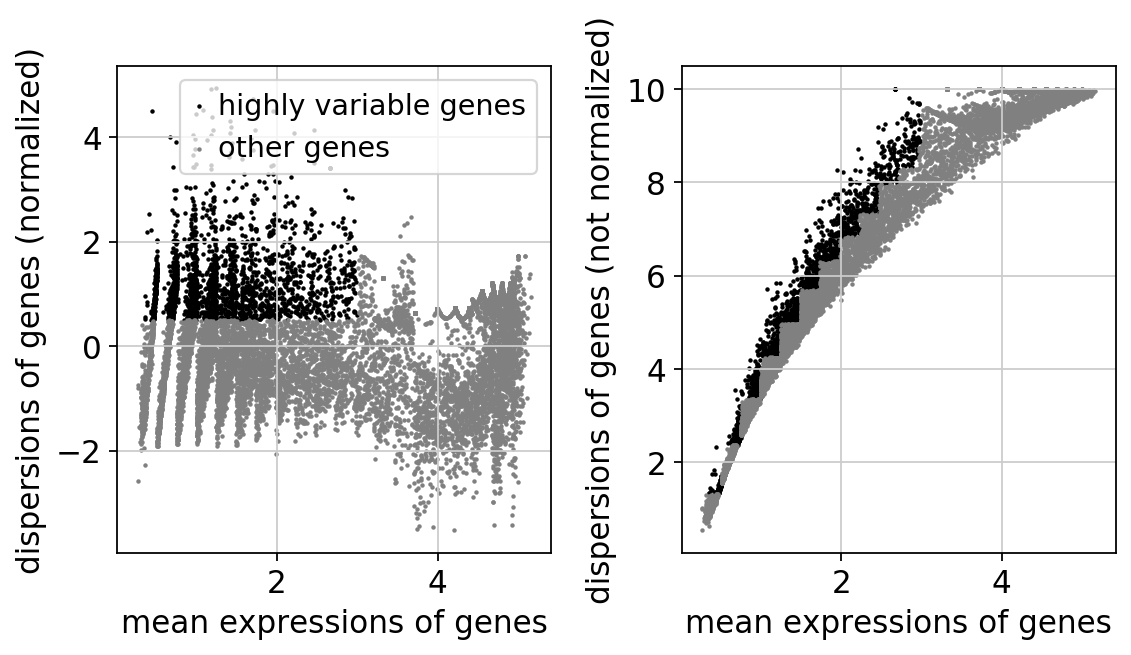

In [16]:
sc.pp.highly_variable_genes(lymphocytes, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(lymphocytes)

In [17]:
lymphocytes = lymphocytes[:, lymphocytes.var.highly_variable]
lymphocytes

View of AnnData object with n_obs × n_vars = 1646 × 2157
    obs: 'ClusterID', 'ClusterName', 'G2M_Score', 'Phase', 'S_Score', 'cell_type', 'integrated_snn_res_0_5', 'nCount_RNA', 'nFeature_RNA', 'orig_ident', 'percent_mt', 'seurat_clusters', 'stage', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'Selected', 'vst_mean', 'vst_variable', 'vst_variance', 'vst_variance_expected', 'vst_variance_standardized', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p'
    layers: 'norm_data'

# Dimensional Reduction

## PCA

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


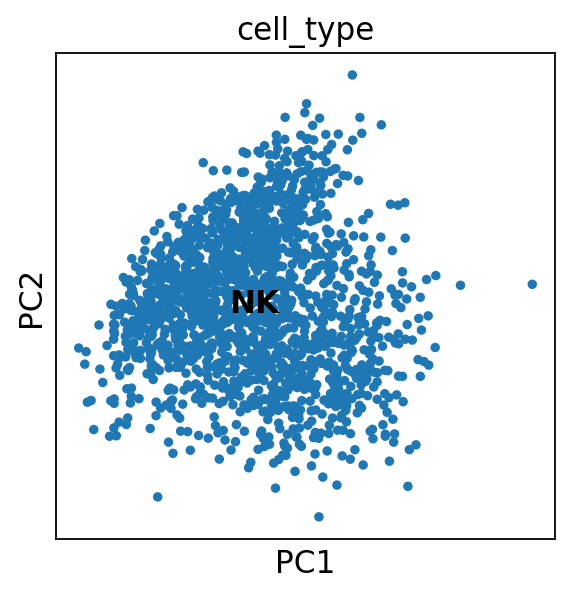

In [18]:
sc.tl.pca(lymphocytes, svd_solver='arpack')
sc.pl.pca(lymphocytes, color='cell_type', legend_loc='on data')

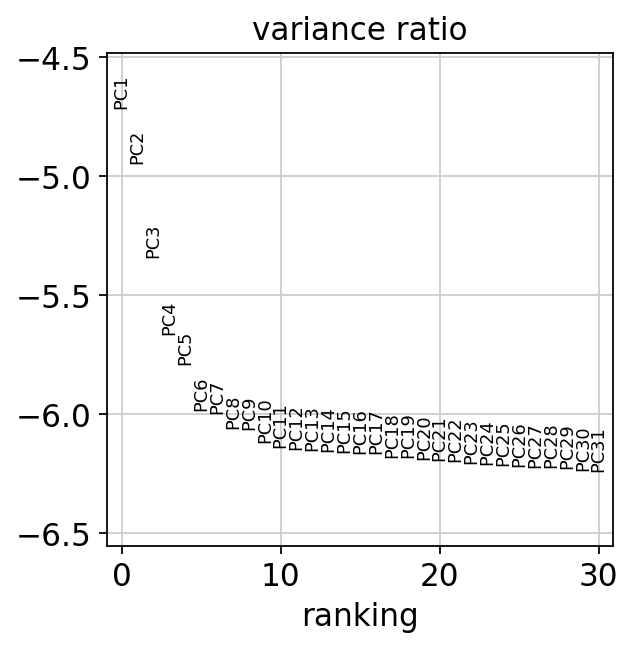

In [19]:
sc.pl.pca_variance_ratio(lymphocytes, log=True)

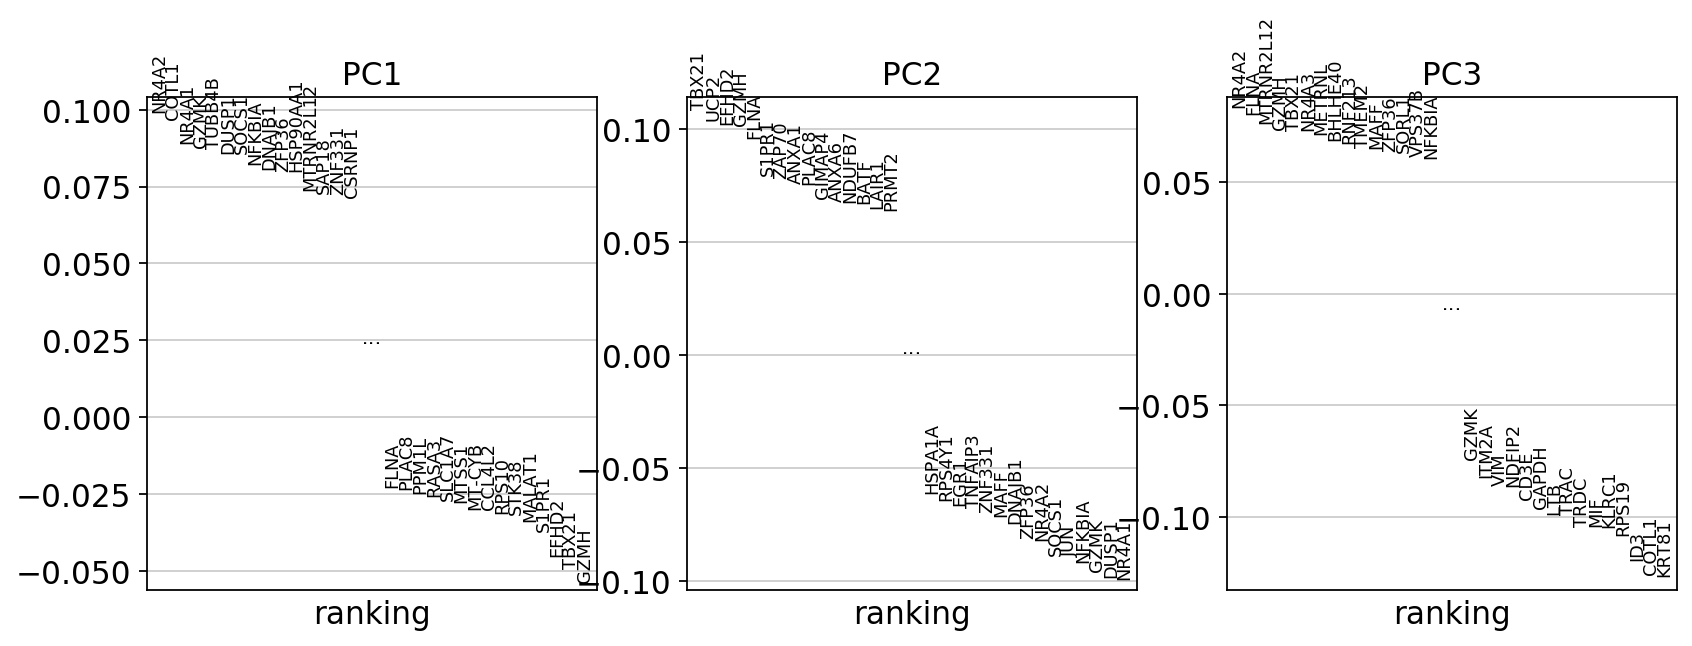

In [20]:
sc.pl.pca_loadings(lymphocytes, components=range(1, 4))

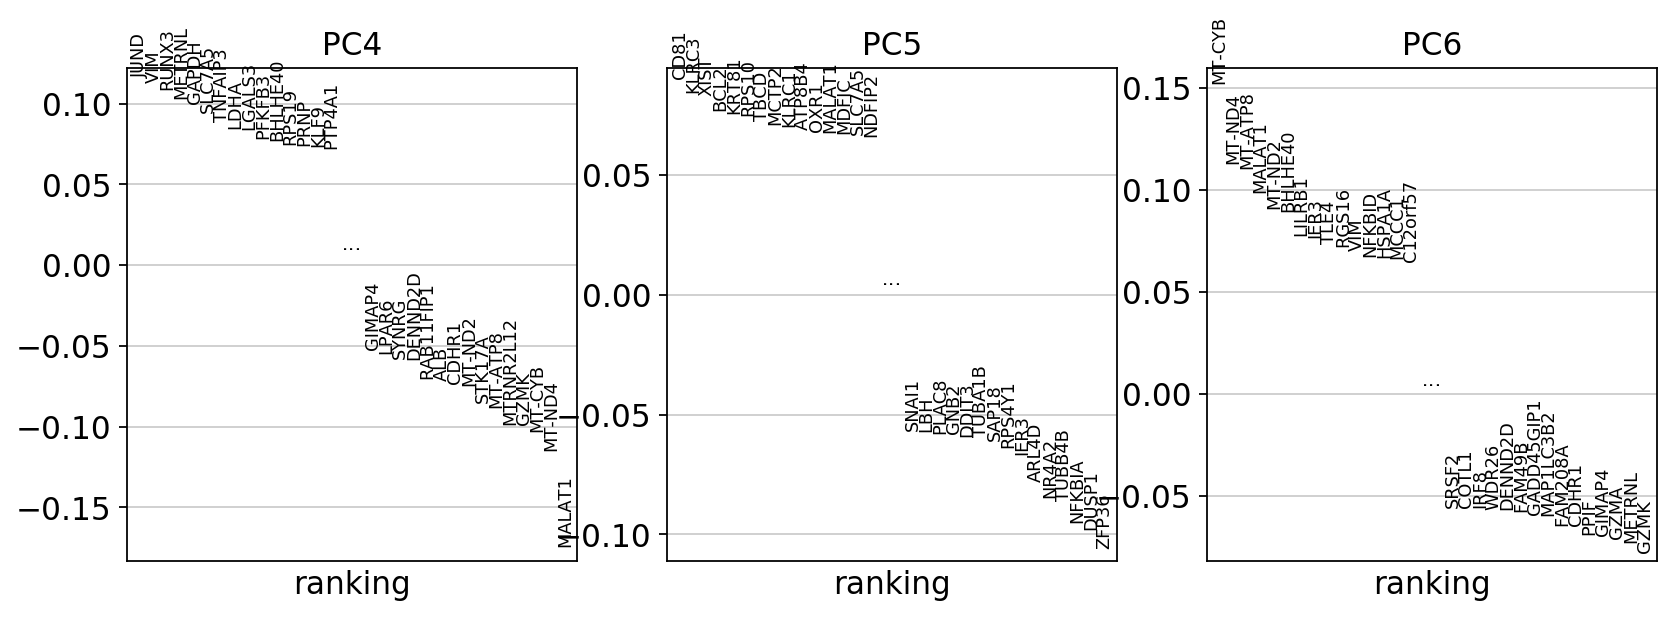

In [21]:
sc.pl.pca_loadings(lymphocytes, components=range(4, 7))

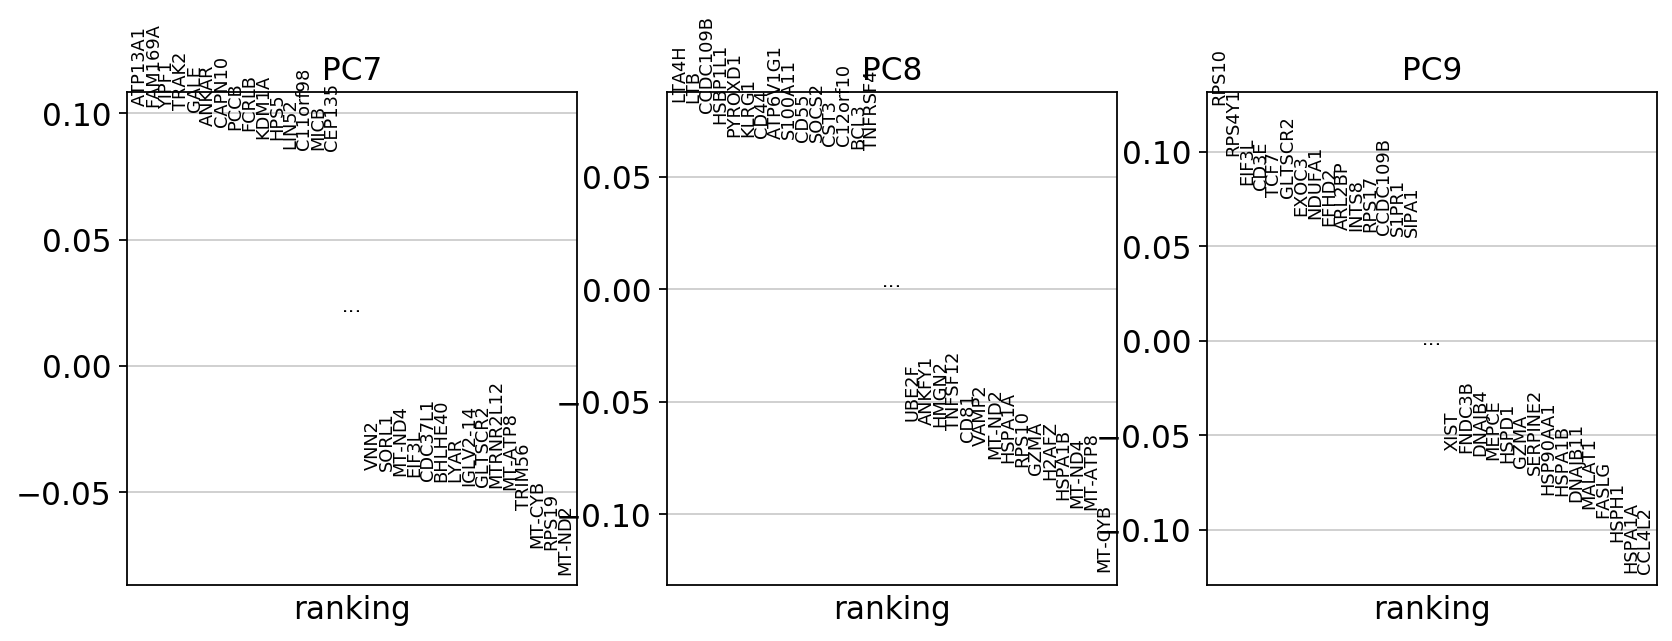

In [22]:
sc.pl.pca_loadings(lymphocytes, components=range(7, 10))

In [23]:
sc.tl.rank_genes_groups(lymphocytes, 'cell_type', method='wilcoxon')
sc.pl.rank_genes_groups(lymphocytes, n_genes=25, sharey=False)

ranking genes


ZeroDivisionError: division by zero

## UMAP

In [24]:
sc.pp.neighbors(lymphocytes)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)


In [25]:
sc.tl.umap(lymphocytes)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


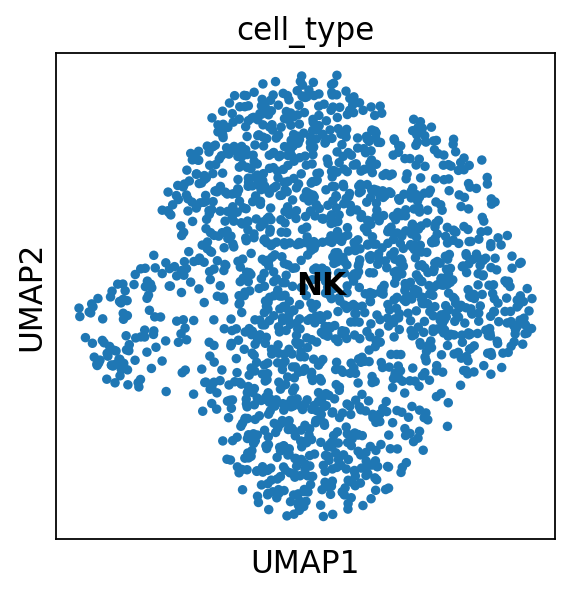

In [26]:
sc.pl.umap(lymphocytes, color='cell_type', legend_loc='on data')

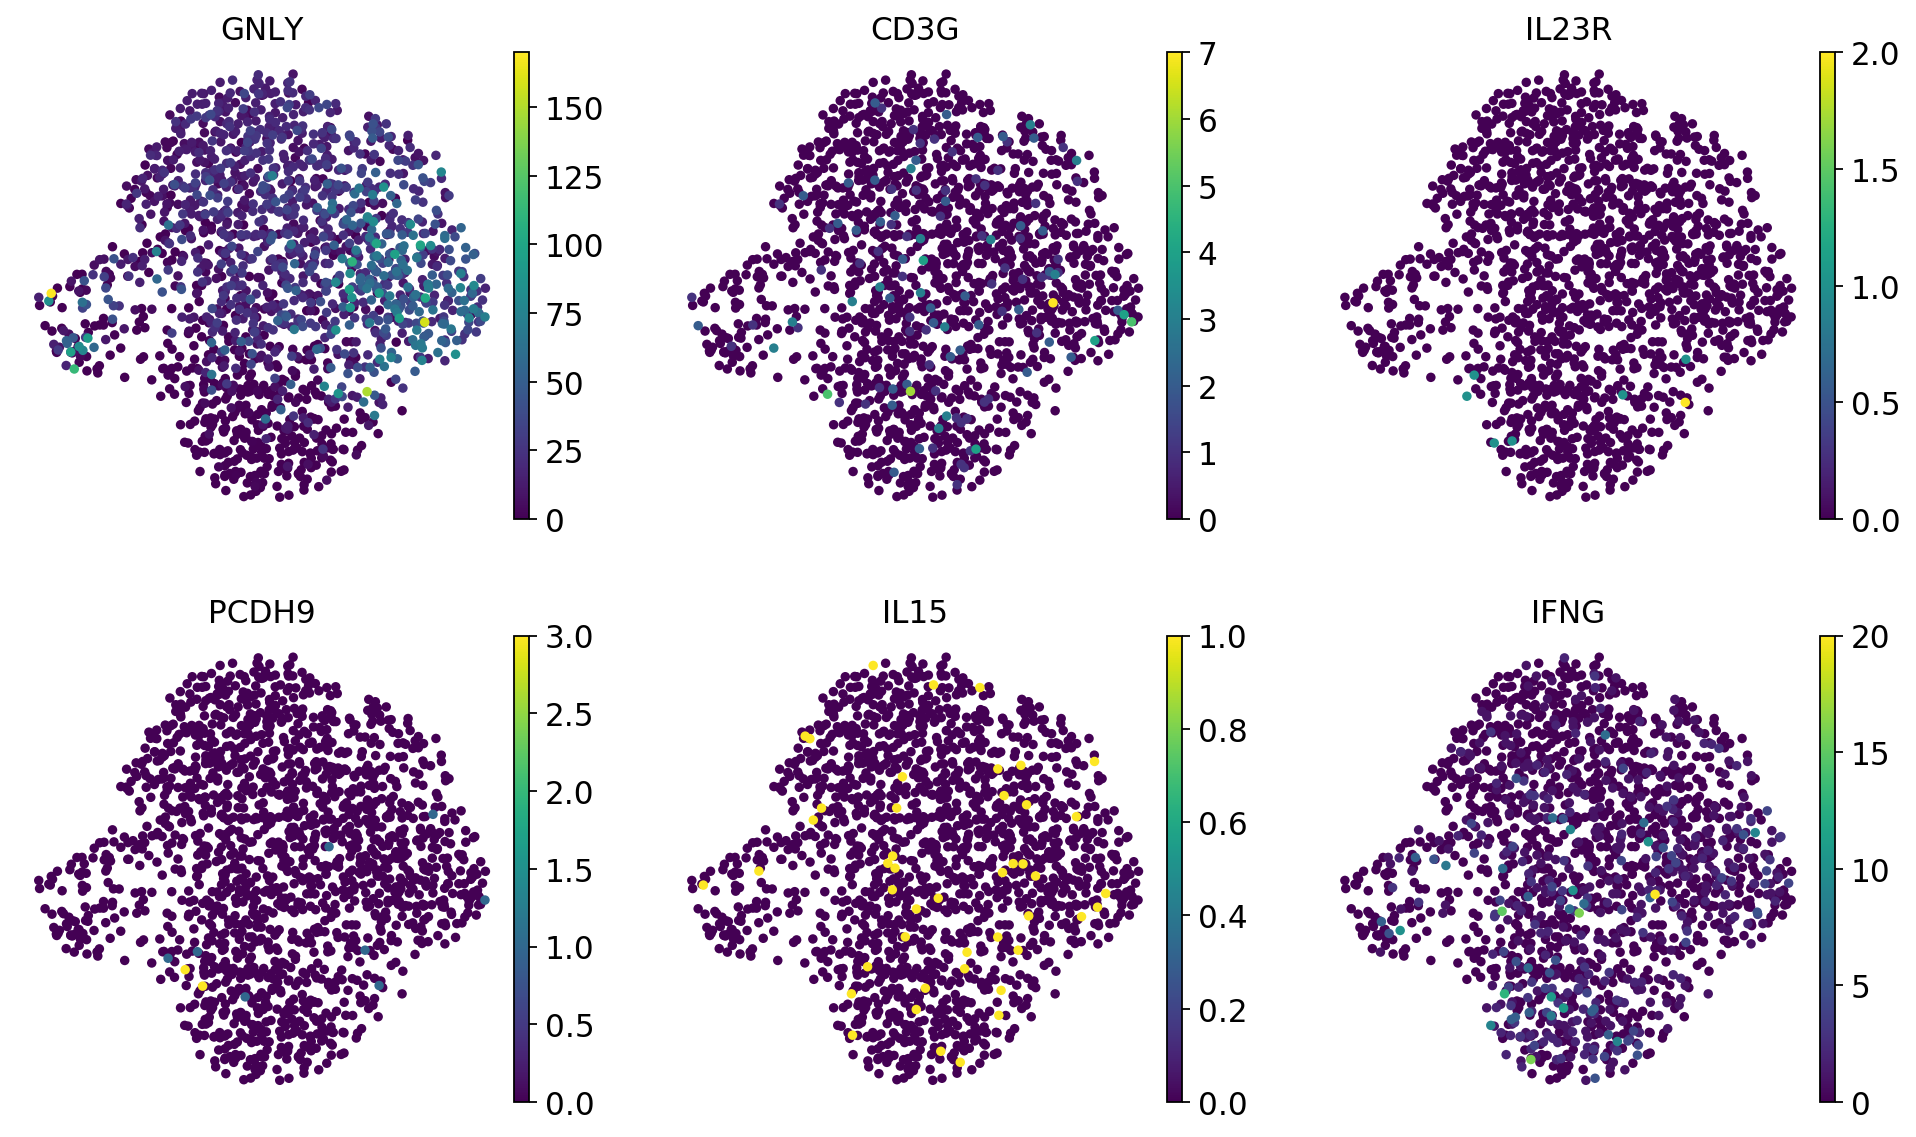

In [27]:
markers = ["GNLY", "CD3G", "IL23R", "PCDH9", "IL15",  'IFNG']
sc.pl.umap(lymphocytes.raw.to_adata(), color=markers, legend_loc='on data', frameon=False, ncols=3)

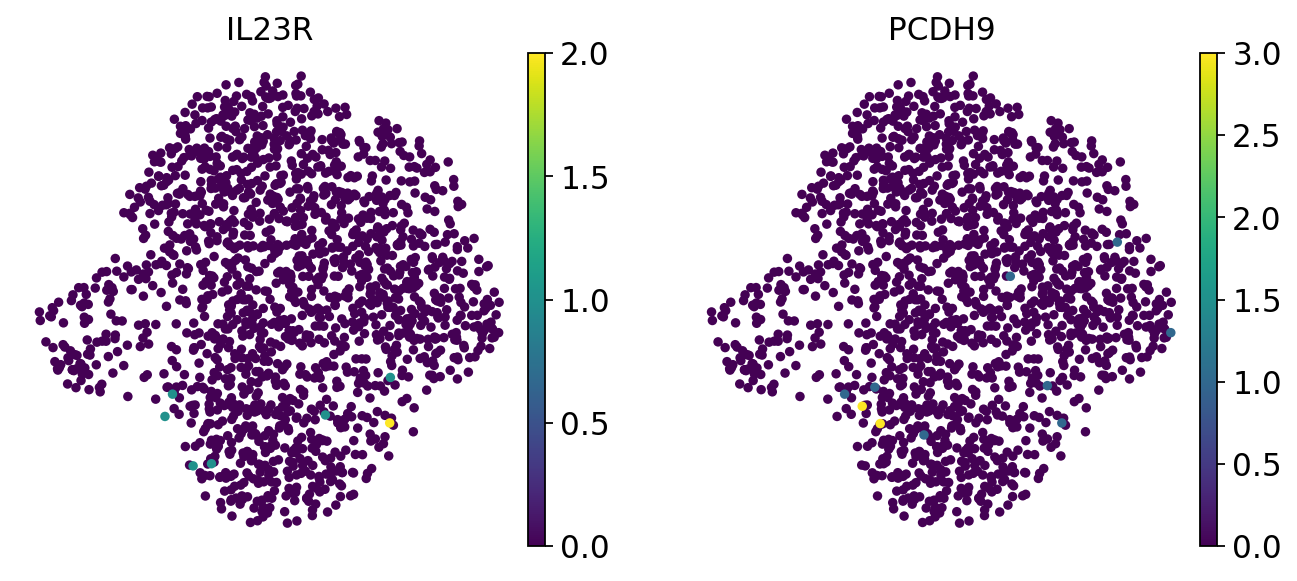

In [28]:
markers = ["IL23R", "PCDH9"]
sc.pl.umap(lymphocytes.raw.to_adata(), color=markers, legend_loc='on data', frameon=False)

In [33]:
il23r = lymphocytes.raw[:, 'IL23R'].X.todense() > 0
pcdh9 = lymphocytes.raw[:, 'PCDH9'].X.todense() > 0

contingency_table = pd.DataFrame([[(~il23r & ~pcdh9).sum(), il23r.sum()], [pcdh9.sum(), (il23r & pcdh9).sum()]],
                                 index=['PCDH9-', 'PCDH9+'],
                                 columns=["IL23R-", "IL23R+"])
display(contingency_table)
chi2, p, dof, ex = scipy.stats.chi2_contingency(contingency_table)
print(f"χ² = {chi2:.2f}, p = {p:.2e}")

,IL23R-,IL23R+
PCDH9-,1631,7
PCDH9+,10,2


χ² = 31.84, p = 1.67e-08


In [34]:
def phi(tab):
    return ((tab[0][0] * tab[1][1] - 
             tab[0][1] * tab[1][0]) / 
            ((tab[0][0] + tab[0][1]) * 
             (tab[1][0] + tab[1][1]) *
             (tab[0][0] + tab[1][0]) *
             (tab[0][1] + tab[1][1]) ) ** .5)

phi(contingency_table.values)

0.1873439900954611

In [35]:
cd3g = lymphocytes.raw[:, 'CD3G'].X.todense() > 0
junb = lymphocytes.raw[:, 'JUNB'].X.todense() > 0

contingency_table = pd.DataFrame([[(~cd3g & ~junb).sum(), cd3g.sum()], [junb.sum(), (cd3g & junb).sum()]],
                                 index=['JUNB-', 'JUNB+'],
                                 columns=["CD3G-", "CD3G+"])
display(contingency_table)
chi2, p, dof, ex = scipy.stats.chi2_contingency(contingency_table)
print(f"χ² = {chi2:.2f}, p = {p:.2e}")

,CD3G-,CD3G+
JUNB-,215,115
JUNB+,1420,104


χ² = 201.83, p = 8.33e-46


In [36]:
phi(contingency_table.values)

-0.33212676686176973

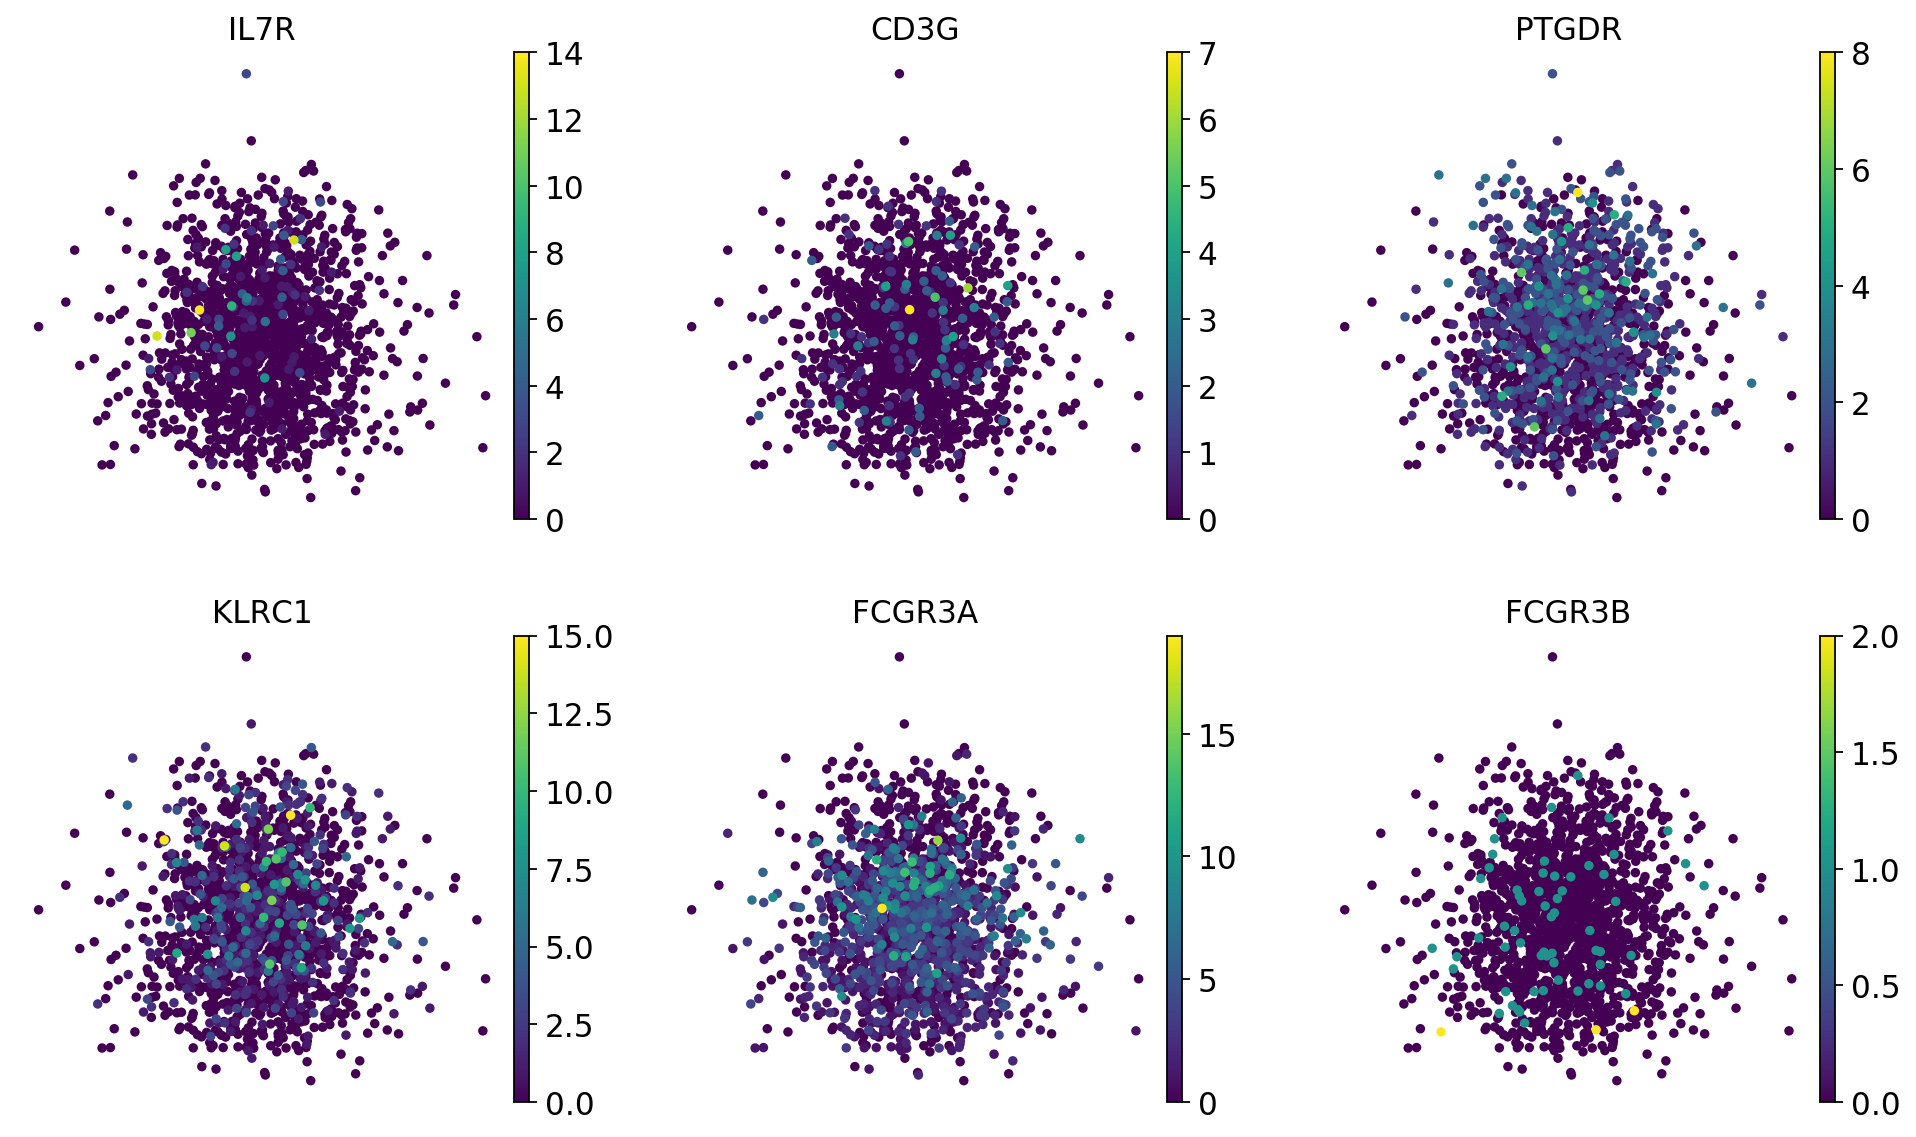

In [61]:
markers = ['IL7R', "CD3G", "PTGDR", "KLRC1", "FCGR3A", "FCGR3B"]
sc.pl.pca(lymphocytes.raw.to_adata(), components=[0, 1], color=markers, legend_loc='on data', frameon=False, ncols=3)

In [38]:
test_genes = ['GATA3', "ID2", "RORA"]
p_df = pd.DataFrame(index=test_genes, columns=test_genes)
phi_df = pd.DataFrame(index=test_genes, columns=test_genes)
for i, gene1 in enumerate(test_genes):
    for gene2 in test_genes[i+1:]:
        try:
            var1 = lymphocytes.raw[:, gene1].X.todense() > 0
            var2 = lymphocytes.raw[:, gene2].X.todense() > 0
            tab = [[(~var1 & ~var2).sum(), var1.sum()], [var2.sum(), (var1 & var2).sum()]]
            chi2, p, dof, ex = scipy.stats.chi2_contingency(tab)
            p_df.loc[gene1, gene2] = p_df.loc[gene2, gene1] = p
            phi_df.loc[gene1, gene2] = phi_df.loc[gene2, gene1] = phi(tab)
        except ValueError:
            pass
        
display(p_df)
display(phi_df)

,GATA3,ID2,RORA
GATA3,NaN,2.03564e-67,6.06757e-07
ID2,2.03564e-67,NaN,2.18877e-77
RORA,6.06757e-07,2.18877e-77,NaN


,GATA3,ID2,RORA
GATA3,NaN,-0.361472,-0.114342
ID2,-0.361472,NaN,-0.374643
RORA,-0.114342,-0.374643,NaN


In [59]:
test_genes = ['IL7R', "CD3G", "PTGDR", "KLRC1", "FCGR3A", "FCGR3B"]
p_df = pd.DataFrame(index=test_genes, columns=test_genes)
phi_df = pd.DataFrame(index=test_genes, columns=test_genes)
for i, gene1 in enumerate(test_genes):
    for gene2 in test_genes[i+1:]:
        try:
            var1 = lymphocytes.raw[:, gene1].X.todense() > 0
            var2 = lymphocytes.raw[:, gene2].X.todense() > 0
            tab = [[(~var1 & ~var2).sum(), var1.sum()], [var2.sum(), (var1 & var2).sum()]]
            chi2, p, dof, ex = scipy.stats.chi2_contingency(tab)
            p_df.loc[gene1, gene2] = p_df.loc[gene2, gene1] = p
            phi_df.loc[gene1, gene2] = phi_df.loc[gene2, gene1] = phi(tab)
        except ValueError:
            pass
        
display(p_df.style.format("{:.2e}"))
display(phi_df.style.format("{:.2f}"))

,IL7R,CD3G,PTGDR,KLRC1,FCGR3A,FCGR3B
IL7R,nan,6.56e-02,3.39e-06,3.39e-01,1.47e-17,1.05e-01
CD3G,6.56e-02,nan,4.01e-05,9.45e-06,5.38e-10,5.01e-01
PTGDR,3.39e-06,4.01e-05,nan,1.39e-19,1.03e-71,4.53e-02
KLRC1,3.39e-01,9.45e-06,1.39e-19,nan,8.07e-54,2.92e-02
FCGR3A,1.47e-17,5.38e-10,1.03e-71,8.07e-54,nan,1.23e-02
FCGR3B,1.05e-01,5.01e-01,4.53e-02,2.92e-02,1.23e-02,nan


,IL7R,CD3G,PTGDR,KLRC1,FCGR3A,FCGR3B
IL7R,nan,0.05,-0.11,-0.03,-0.21,-0.05
CD3G,0.05,nan,-0.10,-0.11,-0.15,0.02
PTGDR,-0.11,-0.10,nan,-0.20,-0.35,-0.05
KLRC1,-0.03,-0.11,-0.20,nan,-0.34,-0.06
FCGR3A,-0.21,-0.15,-0.35,-0.34,nan,-0.06
FCGR3B,-0.05,0.02,-0.05,-0.06,-0.06,nan


filtered out 1179 genes that are detected in less than 5 cells


(array([1062.,  135.,  121.,  102.,   86.,   82.,   93.,   61.,   77.,
          66.,   47.,   64.,   69.,   49.,   60.,   67.,   55.,   54.,
          65.,   56.,   57.,   62.,   63.,   68.,   45.,   69.,   72.,
          67.,   64.,   55.,   55.,   75.,   48.,   56.,   62.,   62.,
          56.,   73.,   63.,   66.,   70.,   89.,   49.,   77.,   75.,
          75.,   67.,   60.,   69.,   72.,   65.,   68.,   79.,   68.,
          93.,   73.,   76.,   63.,   83.,   73.,   99.,   79.,  103.,
          88.,  106.,   81.,   73.,   86.,   95.,  115.,   88.,  108.,
         100.,  116.,   85.,   97.,  109.,  116.,  119.,  122.,  115.,
         142.,  115.,  113.,  120.,  144.,  123.,  131.,  148.,  149.,
         141.,  148.,  151.,  131.,  176.,  175.,  146.,  158.,  173.,
         163.]),
 array([1.94691966e-265, 1.00000000e-002, 2.00000000e-002, 3.00000000e-002,
        4.00000000e-002, 5.00000000e-002, 6.00000000e-002, 7.00000000e-002,
        8.00000000e-002, 9.00000000e-002, 1.000000

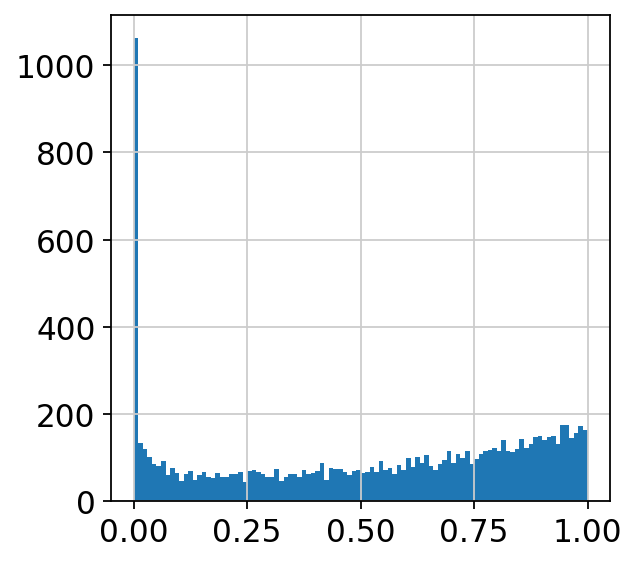

In [58]:
import numpy as np
temp = lymphocytes.raw.to_adata().copy()
sc.pp.filter_genes(temp, min_cells=5)

n_sample_gene_pairs = 10000
n_genes = temp.n_vars

res = []

def chi2(var1, var2):
    chi2, p, dof, ex = scipy.stats.chi2_contingency([[(~var1 & ~var2).sum(), var1.sum()], [var2.sum(), (var1 & var2).sum()]])
    return p

for num in np.random.randint(0, n_genes * n_genes, n_sample_gene_pairs):
    gene1 = temp.var_names[num % n_genes]
    gene2 = temp.var_names[num // n_genes]
    res.append(chi2(lymphocytes.raw[:, gene1].X.todense() > 0, lymphocytes.raw[:, gene2].X.todense() > 0))
    
plt.hist(res, bins=100)